# Analise de dados da cidade de São Paulo

## Importação e amostra da base de dados cru sem qualquer alteração

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

data = pd.read_csv('city_temperature.csv', low_memory=False)
data

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...,...
2906322,North America,US,Additional Territories,San Juan Puerto Rico,7,27,2013,82.4
2906323,North America,US,Additional Territories,San Juan Puerto Rico,7,28,2013,81.6
2906324,North America,US,Additional Territories,San Juan Puerto Rico,7,29,2013,84.2
2906325,North America,US,Additional Territories,San Juan Puerto Rico,7,30,2013,83.8


## Selecionando qual será a cidade escolhida para a analise de dados e deleção de dados nulos

In [5]:
Brasil = data[(data['Country'] == 'Brazil')]
SP = Brasil[(Brasil['City'] == 'Sao Paulo')]
SP = SP.dropna(axis="columns", how="any")

## Fazendo a conversão de fahrenheit para celsius dentro de uma nova coluna e deletando a de fahrenheit

In [6]:
def f(temp):
    temp = (temp - 32) * 5/9
    return float(temp)

SP['Celsius'] = SP['AvgTemperature'].apply(f)
SP = SP.drop(columns=['AvgTemperature'])

## Fazendo a amostra do dado com uma série temporal

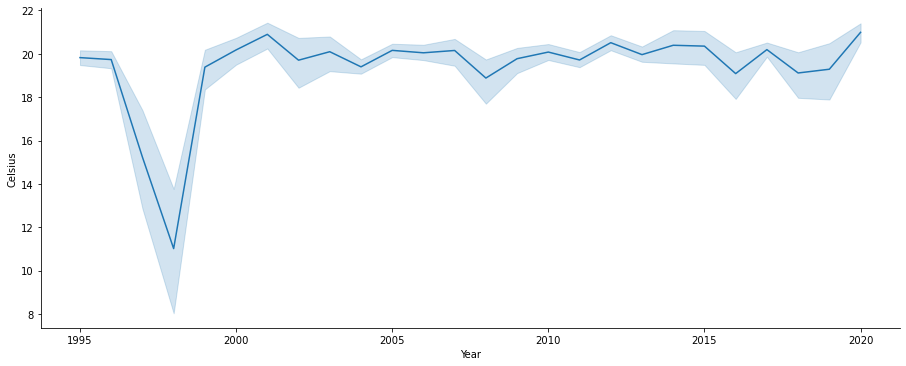

In [7]:
sns.relplot(data = SP, x = 'Year', y = 'Celsius', label = 'São Paulo',kind="line",height=5, aspect=2.5 )



## mostrando se há dados outliers

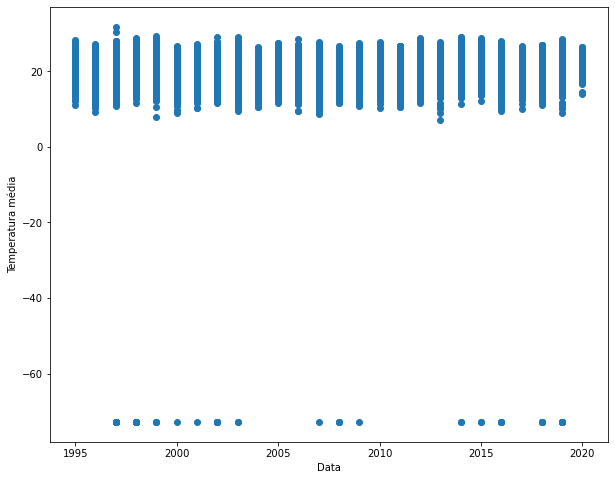

In [8]:
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(SP['Year'], SP['Celsius'])
ax.set_xlabel('Data')
ax.set_ylabel('Temperatura média')
plt.show()

## Colocando os dados processados dentro de um novo csv

In [ ]:
SP
SP.to_csv('SP.csv', encoding='utf-8')